#### **Q1.** Formulation as a classification problem and different feature vectors

In [1]:
import cv2
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import keras
from keras import callbacks
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop, SGD

from matplotlib.colors import ListedColormap
%matplotlib inline

Using TensorFlow backend.


#### Change to the directory containing the images

In [2]:
path = "C:/Users/zlai/Documents/repo/HomeworkTex/ML/hw/homework 1/data/train/airplane"
os.chdir(path)

#### **Q1.** Formulation of the classification problem

The classification problem here is to classify the images in the different folders into one of the classes from the set $\{\mathsf{airplane}, \mathsf{automobile}, \mathsf{bird}, \mathsf{cat}\}$.  

The input image can be converted into a *feature vector* with one of the following examples listed below:

#### 1. Using the raw pixel values

For each `.jpg` image, we can extract the raw pixel values using `cv2.imread` which returns an array representing the raw RGB intensities of the image. Using `.flatten()` we convert the raw image from a multi-dimensional array into a single array of values with dimensions `(3072,)`, which can be used as the input for the classification problem.

(32, 32, 3)


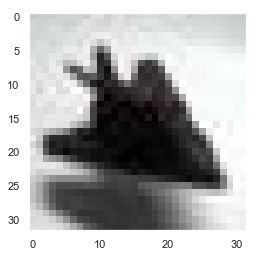

In [3]:
raw_img = cv2.imread('1.jpg')
print (raw_img.shape)
plt.imshow(raw_img)
plt.grid(False)

In [4]:
def convert2pixel_value(filename):
    """
    Converts the filename into a flatten numpy array of the raw pixel values.
    Input:
    - filename (string): name of the file to be processed.
    """
    raw_img = cv2.imread(filename)
    
    return raw_img.flatten()

In [5]:
out = convert2pixel_value('1.jpg')
print (out.shape)

(3072,)


#### 2. Using the mean and standard deviation of each color channel

From each raw image, we can extract out the color channels (RGB), and find the mean and standard deviation value of each color. This array can be used as the feature vector for the classification problem.

In [6]:
def convert2color_mean_std(filename):
    """
    Converts the filename into the mean and standard deviation 
    of the different color channels (RGB).
    Input:
    - filename (string): name of the file to be processed.
    """
    raw_img = cv2.imread(filename)
        
    return cv2.meanStdDev(raw_img)

In [7]:
(mean,std) = convert2color_mean_std('1.jpg')

In [8]:
print (mean)
print (std)

[[148.86035156]
 [148.71875   ]
 [148.17578125]]
[[90.06941242]
 [92.22082554]
 [91.80958747]]


#### 3. Using a color histogram

Given a raw image, we can also extract the color histogram of the image. Depending on the number of bins chosen for the histogram, it will decide the dimension of this feature vector. For example, if we choose 8 bins for each histogram, this means that the values for each color channel will be classified into the following ranges: 0-31, 32-63, 64-95, 96-127, 128-159, 160-191, 192-223, 224-256.

In [9]:
def convert2color_hist(filename, bin):
    """
    Converts the filename into a histogram with bin bins for 
    each of the different color channels (RGB). The concatenated 
    vector of the different color histogram is returned.
    Input:
    - filename (string): name of the file to be processed.
    - bin: number of bins for the histogram of each color channel.
    """
    raw_img = cv2.imread(filename)
    hist = []
    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([raw_img],[channel],None,[bin],[0,256])
        hist.append(histr)
    return np.concatenate(hist)

In [10]:
output = convert2color_hist('1.jpg',bin=8)
print (output.shape)

(24, 1)


We can also use a 3D histogram as the feature vector. Depending on the choice of the number of bins, `b`, we will get a multi-dimensional array of shape `(b,b,b)`. This describes the number of pixels that have blue, green and red in the different intervals corresponding to the number of bins selected. To use it as a feature vector, we simply flatten it to get a vector of dimension `b**3`. 

In [11]:
def convert2color_3Dhist(filename, bin = 8):
    """
    Converts the filename into a 3D histogram. The 3D histogram values 
    are then flattened to return a single dimension array.
    Input:
    - filename (string): name of the file to be processed.
    - bin: number of bins for the histogram of each color channel.
    """
    raw_img = cv2.imread(filename)
    histr = cv2.calcHist([raw_img],[0,1,2],None,[bin]*3,[0,256]*3)
        
    return histr.flatten()

In [12]:
output = convert2color_3Dhist('1.jpg')
print (output.shape)

(512,)
